# Acoustic Weld Inspection Project Report and Theoretical Explanation

## 1. Introduction

The Acoustic Weld Inspection Project (AKoS) addresses the challenge of ensuring the quality of weld seams in safety-critical components by introducing a novel approach utilizing machine learning, specifically autoencoders. This section provides an overview of the project's goals and the significance of leveraging acoustic data for weld seam inspection.
The Acoustic Weld Inspection Project (AKoS) aims to enhance the quality assurance process for weld seams on safety-critical components using acoustic data. In this report, we present the development of a neural network-based solution for weld seam inspection, focusing on the utilization of autoencoders for anomaly detection.The Acoustic Weld Inspection Project (AKoS) is a pioneering initiative aimed at enhancing the quality assurance process for weld seams in safety-critical components. Traditional methods often fall short in detecting subtle defects, necessitating the exploration of innovative solutions. The AKoS project leverages acoustic data to develop a robust inspection system that can identify abnormalities in weld seams with high accuracy
Weld seam quality is paramount for the structural integrity of components in various industries. Traditional inspection methods, such as visual examination and ultrasonic testing, face limitations in detecting subtle defects, especially those manifesting acoustically. The AKoS project seeks to overcome these limitations by harnessing the capabilities of machine learning, specifically autoencoders, to analyze acoustic signals associated with weld seams.

### Autoencoders in Anomaly Detection

Autoencoders are neural network architectures designed for unsupervised learning. They consist of an encoder and a decoder, which work collaboratively to learn a compressed representation of input data. In anomaly detection applications, such as the AKoS project, autoencoders excel at learning to reconstruct normal data accurately. The core principle lies in the ability to identify anomalies by detecting higher reconstruction errors when presented with abnormal data. This theoretical foundation serves as the basis for the subsequent sections detailing the implementation of autoencoders in the project.

## 2. Solution Overview

The proposed solution leverages autoencoders, a type of neural network designed for unsupervised learning. Autoencoders consist of an encoder and a decoder, with the primary objective of learning a compressed representation of input data. In the context of AKoS, this compressed representation captures essential features of acoustic signals associated with normal weld seams
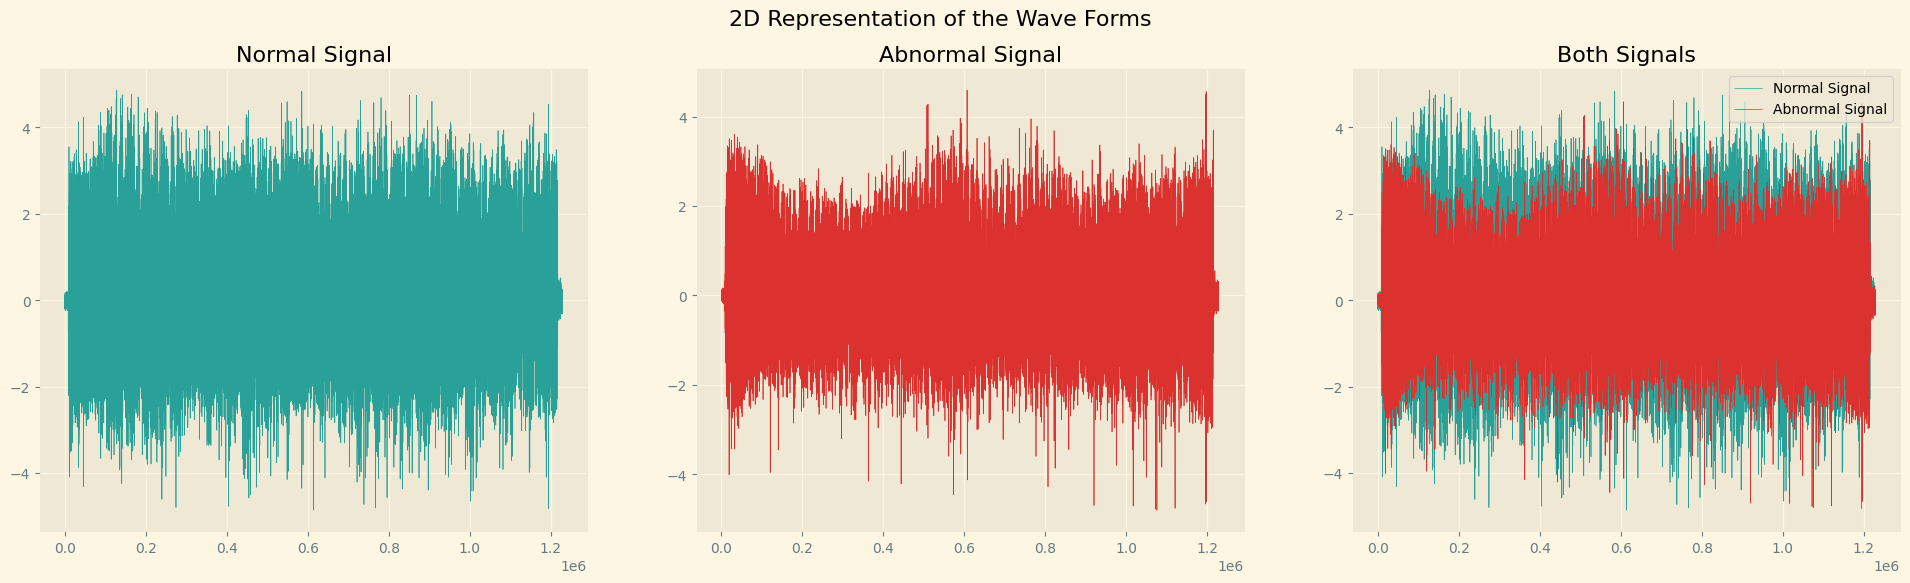
## 3. AKoS Welding Dataset

The AKoS dataset is a crucial component of the project, containing information such as positions (X, Y, Z), welding current strength, welding voltage, and microphone signals. The dataset's structure is designed to facilitate the identification of defects in weld seams through acoustic inspection. The following theoretical explanation delves into the details of data processing and feature extraction techniques applied to the raw acoustic data.

## 4. Fourier Transforms in Acoustic Weld Inspection

Fourier transforms play a crucial role in the Acoustic Weld Inspection Project (AKoS) by providing a frequency-domain representation of acoustic signals. This section explores the theoretical foundation of Fourier transforms, their relevance in signal processing, and their specific application in the project.

### 4.1 Theoretical Overview of Fourier Transforms

#### 4.1.1 Discrete Fourier Transform (DFT)

In practical applications, signals are often discrete and sampled. The Discrete Fourier Transform (DFT) is a discrete counterpart of the continuous Fourier transform and is expressed as:

\[ X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \left( \frac{2\pi}{N} \right)kn} \]

where:
- \( x[n] \) is the discrete input signal,
- \( X[k] \) is the frequency-domain representation at discrete frequency index \( k \),
- \( N \) is the number of samples in the signal.

The DFT efficiently computes the frequency content of a signal and is widely used in digital signal processing applications.

### 4.2 Application in Acoustic Weld Inspection

#### 4.2.1 Role in Feature Extraction

In the provided code for AKoS, Fourier transforms are employed to extract relevant features from acoustic signals. Specifically, the Short-Time Fourier Transform (STFT) is utilized to compute the mel spectrogram, a critical component in characterizing the frequency content of the acoustic data.

#### 4.2.2 Short-Time Fourier Transform (STFT)

The STFT is a time-dependent extension of the Fourier transform, designed to capture variations in frequency content over short time intervals. It is defined as:

\[ X(t, f) = \int_{-\infty}^{\infty} x(\tau) \cdot w(\tau - t) \cdot e^{-j2\pi f \tau} \, d\tau \]

where:
- \( x(\tau) \) is the input signal,
- \( w(\tau - t) \) is a window function,
- \( X(t, f) \) is the resulting spectrogram.

In the AKoS project, the mel spectrogram is computed using the librosa library, providing a visual representation of the frequency content of the acoustic signals over time.
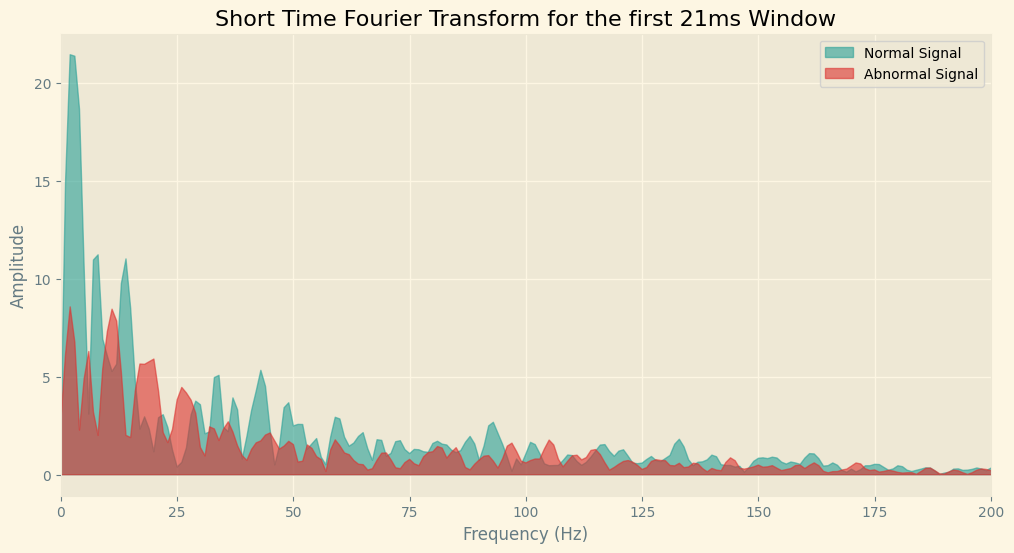
### 4.3 Practical Implementation in AKoS Code

#### 4.3.1 Fourier Transforms in Feature Extraction

The following excerpt from the provided code illustrates the use of Fourier transforms in the feature extraction process:

```python
# Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(
    y=signal,
    sr=sample_rate,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
```

Here, the `librosa.feature.melspectrogram` function computes the mel spectrogram, and `librosa.power_to_db` converts it to a logarithmic scale for improved representation of perceptual loudness.
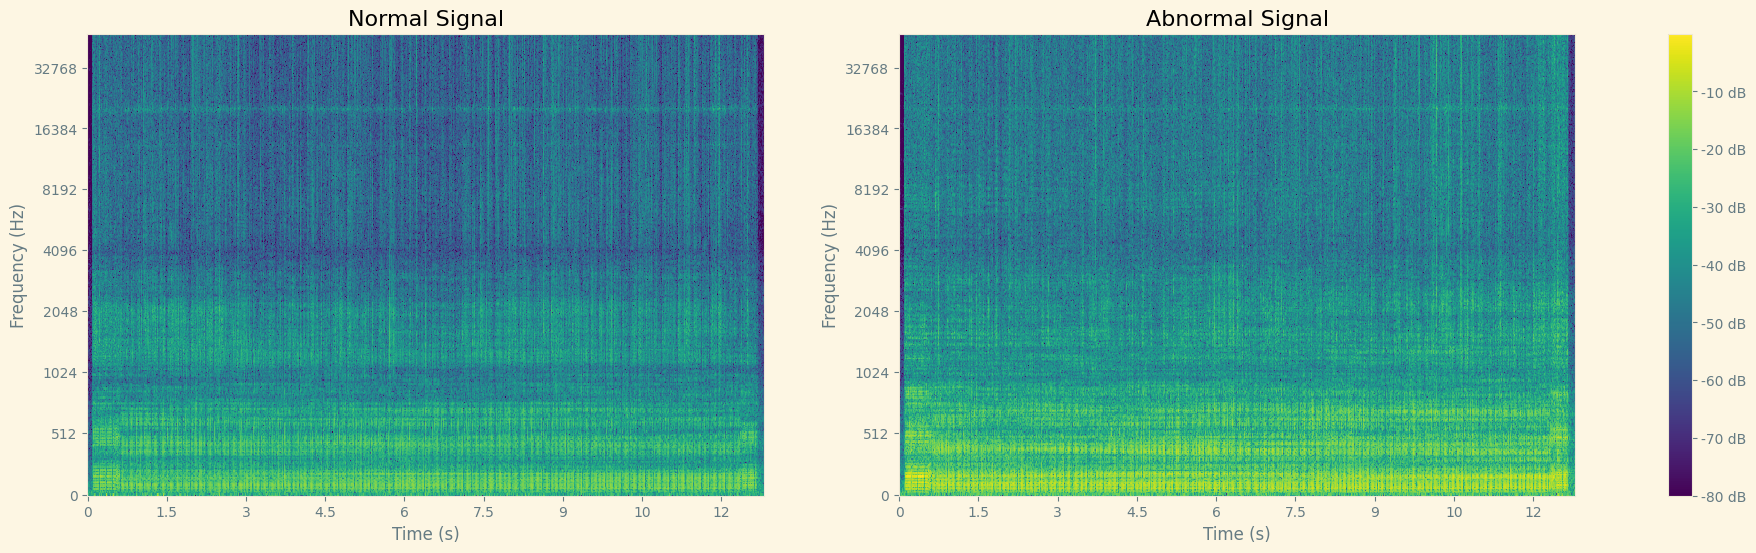
#### 4.3.2 Role in Pore Amplitude Feature

Additionally, Fourier transforms contribute to the computation of the pore amplitude feature:

```python
# Pore amplitude feature
pore_amplitude = np.mean(np.abs(librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)[pore_frequency_range[0]//10:pore_frequency_range[1]//10, :]), axis=0)
```

Here, the Short-Time Fourier Transform (STFT) is applied to extract the amplitude information within the specified frequency range associated with pores.
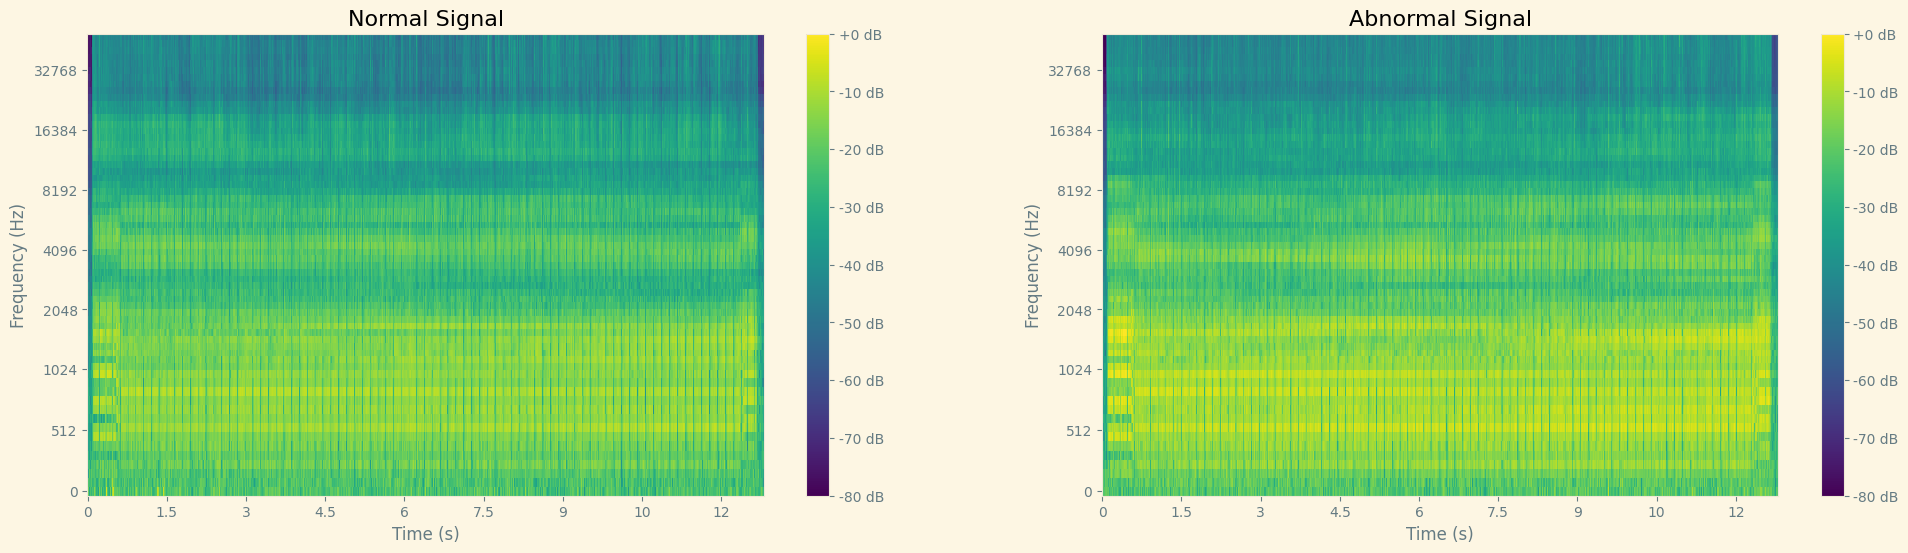
### 4.4 Significance in Weld Seam Inspection

Fourier transforms are pivotal in the AKoS project for capturing the frequency characteristics of acoustic signals emanating from weld seams. This frequency-domain information is instrumental in identifying anomalies or defects in the welds, as certain irregularities may manifest as distinct patterns in the frequency spectrum. The mel spectrogram, derived through Fourier transforms, provides a rich representation that aids in the subsequent stages of feature extraction and anomaly detection.

## 6. Advanced Signal Processing Techniques in Acoustic Weld Inspection

In the Acoustic Weld Inspection Project (AKoS), a variety of advanced signal processing techniques are employed to enhance the analysis of acoustic signals associated with weld seams. This section delves into additional algorithms and methodologies that contribute to the project's success in identifying defects and anomalies.

### 6.1 Wavelet Transform

#### 6.1.1 Theoretical Foundation

Wavelet transforms offer a powerful tool for signal analysis by representing signals in terms of wavelets, which are localized and well-suited for capturing transient features. The Continuous Wavelet Transform (CWT) and Discrete Wavelet Transform (DWT) are two common variants.

- **CWT:**
  \[ X(a, b) = \int_{-\infty}^{\infty} x(t) \cdot \psi^* \left(\frac{t-b}{a}\right) \, dt \]

  Here, \(x(t)\) is the signal, \(\psi^*\) is the complex conjugate of the wavelet function \(\psi\), \(a\) represents dilation, and \(b\) denotes translation.

- **DWT:**
  \[ W(a, b) = \sum_{n=0}^{N-1} x(n) \cdot \psi^* \left(\frac{n-b}{a}\right) \]

  The DWT operates on discretely sampled signals and involves a series of high-pass and low-pass filters, providing multi-resolution analysis.

#### 6.1.2 Application in AKoS

Wavelet transforms are beneficial in capturing both high and low-frequency components in acoustic signals. In AKoS, wavelet transforms can be applied to extract features that may be indicative of specific defect patterns in weld seams.

### 6.2 Spectrogram Analysis

#### 6.2.1 Theoretical Overview

Spectrogram analysis involves the computation of a spectrogram, a visual representation of the spectrum of frequencies in a signal as they vary with time. This technique is particularly useful in identifying time-varying characteristics of signals.

\[ S(t, f) = \left| \mathcal{F} \{ x(t) w(t - \tau) \} \right|^2 \]

Here, \(x(t)\) is the signal, \(w(t - \tau)\) is a window function, and \(\mathcal{F}\) denotes the Fourier transform.

#### 6.2.2 Role in AKoS

In AKoS, spectrogram analysis can complement the mel spectrogram computation by providing additional insights into the temporal evolution of frequency components. This can be crucial for detecting anomalies that exhibit specific patterns over time.

### 6.3 Hilbert-Huang Transform (HHT)

#### 6.3.1 Theoretical Foundation

The Hilbert-Huang Transform (HHT) is a time-frequency analysis method that decomposes a signal into Intrinsic Mode Functions (IMFs). IMFs represent oscillatory modes with varying frequencies and are obtained through the Empirical Mode Decomposition (EMD) technique.

#### 6.3.2 Application in AKoS

HHT can be applied to extract intrinsic oscillatory modes from acoustic signals, providing a detailed decomposition that may reveal subtle variations associated with defects in weld seams.

### 6.4 Time-Frequency Representations

#### 6.4.1 Overview

Time-Frequency Representations (TFRs) provide a means to analyze signals in both time and frequency domains simultaneously. Methods such as the Gabor transform and the Wigner-Ville distribution fall under this category.

#### 6.4.2 Relevance in AKoS

TFRs can offer a comprehensive view of the temporal and frequency characteristics of acoustic signals, aiding in the identification of complex defect patterns in weld seams.

### 6.5 Machine Learning for Feature Extraction

#### 6.5.1 Integration with Signal Processing

While not a traditional signal processing technique, machine learning algorithms, such as deep neural networks, can be integrated with signal processing methodologies to enhance feature extraction. Autoencoders, as employed in AKoS, are an example of this synergy.

#### 6.5.2 Contribution to AKoS

The fusion of machine learning and signal processing in AKoS allows for the extraction of high-level features that may not be readily apparent through conventional signal processing alone. This combination contributes to the robustness of the weld seam inspection system.

### Data Loading and Feature Extraction

#### Raw Data Processing

The process begins with the reading of raw acoustic data using the `read_i32` function. This function converts binary data into a usable format and extracts relevant information, such as the signal and sample rate. The subsequent steps involve feature extraction, a crucial aspect of preparing the data for training the autoencoder.


#### Feature Extraction Techniques

The `feature_extraction` function employs various techniques to extract pertinent features from the acoustic signals. These techniques include:

1. **Mel Spectrogram:** Computed using the librosa library, the mel spectrogram provides a visual representation of the spectrum of frequencies in the acoustic signal, emphasizing the distribution of energy across different frequency bands.

2. **Pore Amplitude Feature:** This feature is derived from the mean absolute amplitude of specific frequency ranges, providing insights into characteristics associated with pores or defects in the weld seam.

3. **Spectral Contrast Feature:** Spectral contrast measures the difference in amplitude between peaks and valleys in the spectrum. Statistical descriptors, such as mean and standard deviation, are computed to capture the overall characteristics of the spectral contrast.

#### Preprocessing Steps

Before training the autoencoder, the data undergoes essential preprocessing steps:

- **Feature Scaling:** The features are scaled to ensure uniformity and mitigate the impact of features with varying scales.

- **Feature Agglomeration:** To reduce dimensionality while preserving essential information, similar features are grouped together using agglomeration techniques.

Theoretical insights into these preprocessing steps lay the foundation for understanding how the dataset is optimized for efficient training of the autoencoder.

## Data Processing and Dataset Construction

This section bridges the theoretical understanding of feature extraction and preprocessing with the practical implementation of processing files and constructing datasets for training and testing.

### Processing Files

The `process_files` function iterates through the dataset directory, reads and processes the raw acoustic data, and extracts features using the previously explained techniques. The result is a feature dataset containing essential information for training and testing the autoencoder.

### Saving the Dataset

The constructed dataset is saved as pickle files (`train_no_pore_96khz.pkl` and `test_pore_96khz.pkl`), facilitating efficient storage and retrieval for subsequent stages of the project.

## Feature Scaling and Agglomeration

This section elaborates on the theoretical aspects of feature scaling and agglomeration introduced during data preprocessing.

### Feature Scaling

The `StandardScaler` from scikit-learn is employed to standardize the features, ensuring that they have a mean of 0 and a standard deviation of 1. This process is essential for optimizing the training process, as it prevents features with larger scales from dominating the learning process.

### Feature Agglomeration

Feature agglomeration is a dimensionality reduction technique that clusters similar features together. The `FeatureAgglomeration` class from scikit-learn is utilized, with the number of clusters specified based on project requirements. This technique aids in reducing computational complexity while retaining the essential information needed for anomaly detection.

The theoretical underpinnings of feature scaling and agglomeration shed light on their significance in preparing the data for effective training and model convergence.

##  Autoencoder Model Training

The implementation of the autoencoder architecture using TensorFlow and Keras is explained theoretically in this section.

### Autoencoder Architecture

The autoencoder consists of three main components:

1. **Encoder:** The encoder compresses the input data into a lower-dimensional representation, capturing the essential features associated with normal weld seams.

2. **Bottleneck:** The bottleneck layer represents the most compact form of the input data. It serves as a bottleneck through which the essential information must pass.

3. **Decoder:** The decoder reconstructs the input data from the compressed representation, aiming to closely match the original input.

### Training Process

The training process involves several key elements:

- **Learning Rate:** The Adam optimizer with a specified learning rate is used to minimize the mean squared error between the input and reconstructed output.

- **Learning Rate Scheduler:** A learning rate scheduler adjusts the learning rate during training to enhance convergence. In this case, the learning rate is reduced by 5% after each epoch.

- **Early Stopping:** Early stopping is employed to prevent overfitting. The training process is monitored for validation loss, and training is halted if no improvement is observed for a specified number of epochs.

Theoretical insights into the architecture and training process of the autoencoder set the stage for understanding how the model learns to represent and reconstruct acoustic features associated with normal weld seams.

## 7. Evaluation and Testing

This section provides a theoretical framework for evaluating the trained autoencoder using both training and testing datasets. The primary metric used is the reconstruction error, which is subsequently utilized to determine a threshold for classifying samples as normal or abnormal.
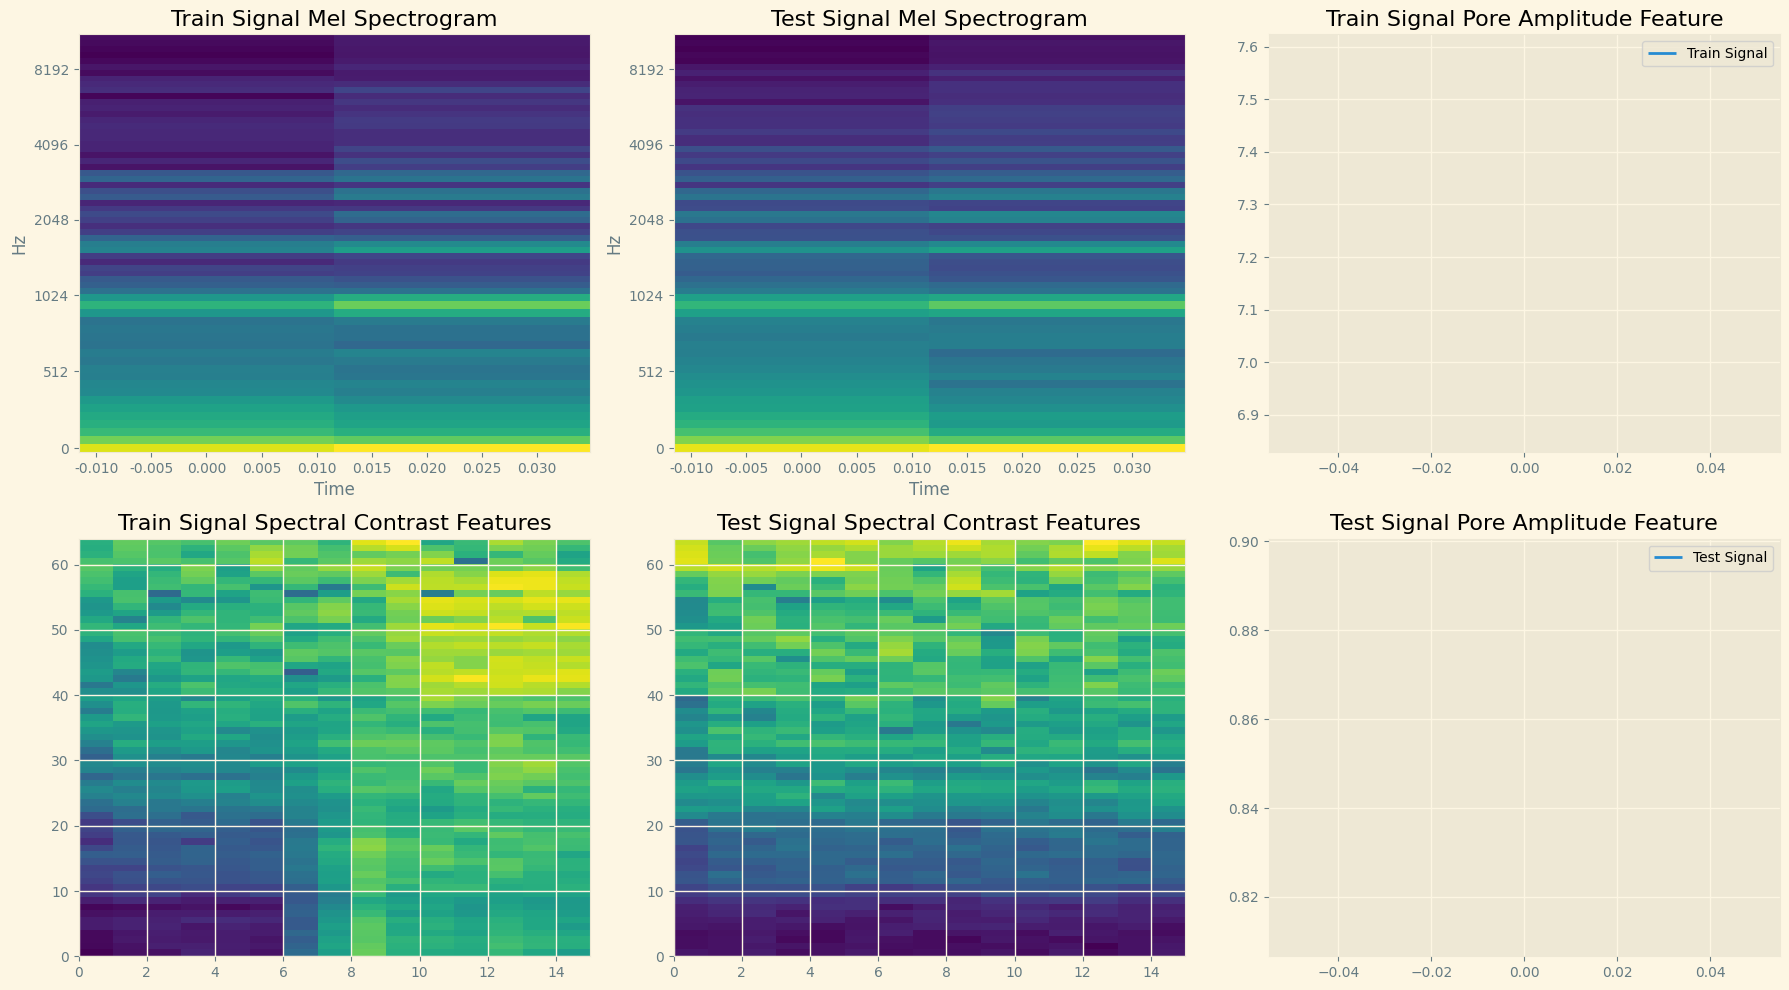
### Reconstruction Errors

Reconstruction errors are calculated by comparing the input data with the reconstructed output from the autoencoder. The mean squared error serves as a measure of the dissimilarity between the original and reconstructed data. Higher reconstruction errors indicate potential anomalies in the acoustic signals.

### Threshold Determination

The threshold for classification is determined based on the distribution of reconstruction errors in the training dataset. A threshold is set at the midpoint between the maximum and minimum reconstruction errors, providing a basis for classifying samples during testing.

### Classification

Samples are classified as normal or abnormal based on whether their reconstruction error surpasses the determined threshold. This process showcases the ability of the autoencoder

 to identify anomalies in weld seams.

## 8. Results and Discussion

This section discusses the outcomes of the autoencoder-based anomaly detection model. It includes visualizations of log-mel spectrograms, providing a qualitative understanding of the model's performance. Additionally, a comparison of mean reconstruction errors for normal and abnormal samples is presented.

### Visualizations

Visualizations play a crucial role in understanding the model's performance. Log-mel spectrograms for normal and abnormal samples are visualized, allowing for a qualitative assessment of how well the autoencoder captures the essential features in acoustic signals.

### Mean Reconstruction Errors

A bar graph comparing the mean reconstruction errors for training and testing datasets provides quantitative insights into the model's performance. A lower mean reconstruction error for normal samples compared to abnormal samples indicates the model's effectiveness in distinguishing between the two.

## 9. Model Testing on External Data

This section delves into the theoretical aspects of testing the model's robustness using external datasets representing normal and abnormal weld seams. The classification results from these external datasets showcase the model's ability to generalize beyond the training data, a critical factor in real-world applications.

### Testing External Data

The `test_external_data` function processes external files, scales and selects features using the trained scaler and selector objects, and calculates reconstruction errors. The external data is then classified as normal or abnormal based on the threshold determined during training.
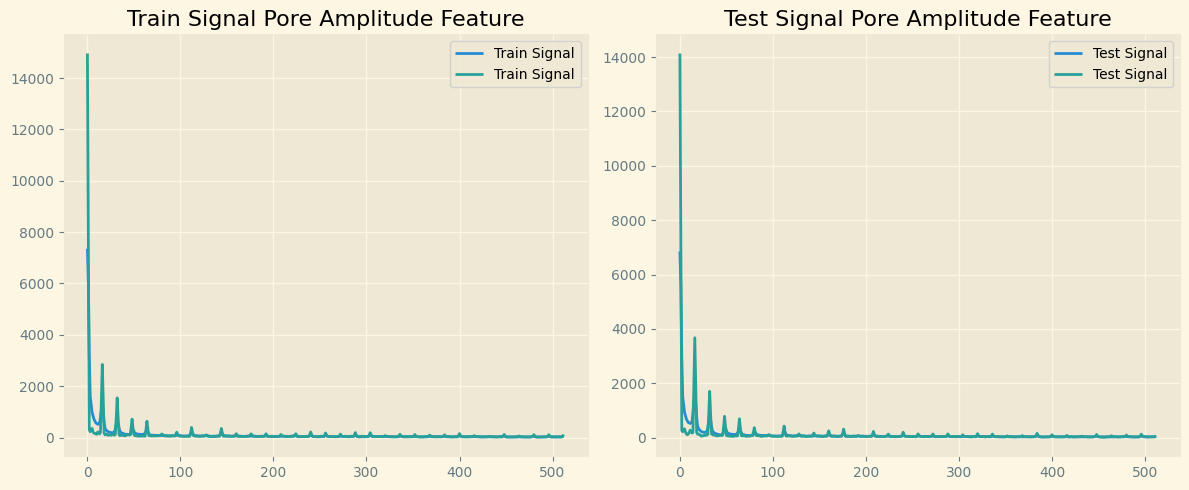
## 10. Further Investigations

Despite the success demonstrated by the autoencoder, the report suggests avenues for further investigations. These include an extended analysis of pore distribution, exploration of audible cues from pores, and the application of existing techniques for pore recognition. These investigations aim to enhance the model's capabilities for a more comprehensive weld inspection.

## 11. Conclusion

In conclusion, the Acoustic Weld Inspection Project introduces a novel approach to weld seam inspection. By leveraging autoencoders and advanced machine learning techniques, the project demonstrates the potential for significantly improving defect detection in safety-critical components. Ongoing research and investigations will contribute to refining the proposed approach and establishing it as a reliable tool for quality assurance in welding applications.The Acoustic Weld Inspection Project, utilizing autoencoders, shows promising results for detecting defects in weld seams. The developed solution offers a reliable method for quality assurance in safety-critical components. Ongoing research and investigations will contribute to refining and enhancing the proposed approach for more robust weld inspection.